# Imports

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=ee7fe4675f92c2dd435f0552045e558388a97659f4d2274a99bd99f1591a352a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=04f7fff0790ecf642de981002aa0ba87b0bea3b0d5a42a7b8ed019cb15893d56
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from google.colab import drive
import sys
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from gensim.models import KeyedVectors
import os
from nltk.tokenize import TreebankWordTokenizer
from gensim.models.keyedvectors import KeyedVectors
import matplotlib.pyplot as plt
import time
from google.colab import drive
import pickle
import pprint
from collections import defaultdict

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [ ]:
drive.mount('/content/gdrive')
GDRIVE_DIR = "/content/gdrive/My Drive"
!time wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!mkdir -p "$GDRIVE_DIR"
!mv glove.6B.300d.txt "$GDRIVE_DIR/"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!unzip files.zip
!rm files.zip
!gdown --folder https://drive.google.com/drive/folders/1gFIrqTvvi6wsowcN3U2iZiVDvEC3fuxq
!mv -v "Structured Task (sentence decoding)"/* ./

Mounted at /content/gdrive
--2023-06-22 10:16:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-22 10:16:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-22 10:16:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Savi

In [ ]:
from learn_decoder import *

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=41972e9ba04f457cead0c093ca9ffa896598331d94f3f87d61a2f629bb3f5f1b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.6 MB/s eta 0:00:00


In [ ]:
pip install torch==1.2.0 torchvision==0.4.0 -f


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-f option requires 1 argument


# Upload Data - EXP2

In [ ]:
with open('EXP2.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
exp2_vectors_ = read_matrix("vectors_384sentences.GV42B300.average.txt", sep=" ")
exp2_sentencesfile = open("stimuli_384sentences.txt", "r")
exp2_concepts = np.asarray(exp2_sentencesfile.readlines())
exp2_sentencesfile.close()
print(f'EX2 vectors shape {exp2_vectors_.shape}, and number of sentences={exp2_concepts.shape}')

EX2 vectors shape (384, 300), and number of sentences=(384,)


# Ex2 - FMRI representations

In [ ]:
keyPassageCategory = data['keyPassageCategory']
keyPassages = data['keyPassages']
keySentences = data['keySentences']
labelsPassageCategory = data['labelsPassageCategory']
labelsPassageForEachSentence = data['labelsPassageForEachSentence']
labelsSentences = data['labelsSentences']
fMRI_data = data['Fmridata']

# Ex2 - BERT representations

In [ ]:
from sentence_transformers import SentenceTransformer
# BERT_model = SentenceTransformer('all-distilroberta-v1')
BERT_model = SentenceTransformer('paraphrase-albert-small-v2')

In [ ]:
ex2_vectors_BERT = BERT_model.encode(exp2_concepts)

# Dimensionality Reduction

In [ ]:
def find_elbow_point(variance_ratio):
    # Calculate the differences between consecutive variance ratios
    diff = np.diff(variance_ratio)

    # Calculate the second differences
    diff2 = np.diff(diff)

    # Find the index of the maximum second difference
    elbow_index = np.argmax(diff2) + 1

    return elbow_index

## BERT

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the BERT representations
standardized_BERT = StandardScaler().fit_transform(ex2_vectors_BERT)

### Examine the explained variance ratio to determine the number of components that capture a significant amount of the variance in the data

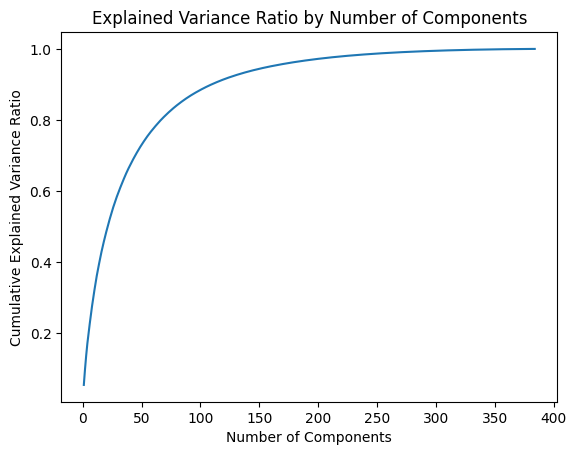

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(standardized_BERT)

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()


When interpreting the cumulative explained variance ratio plot in PCA, higher values are generally better. The plot shows the cumulative amount of variance explained by each additional principal component.

The x-axis represents the number of components, and the y-axis represents the cumulative explained variance ratio. The cumulative explained variance ratio tells the proportion of the total variance in the data that is explained by the corresponding number of components.

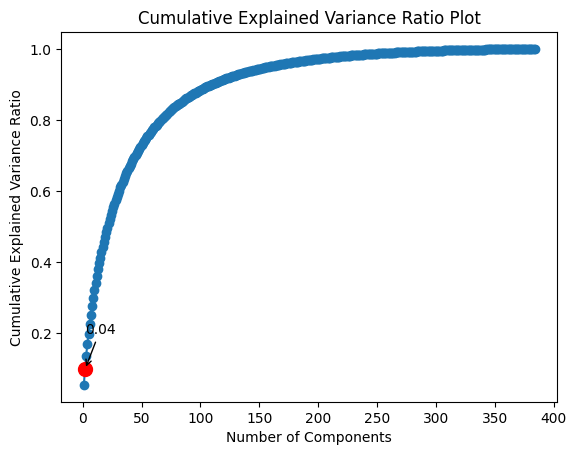

In [ ]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio),
         marker='o', linestyle='-')

# Find the elbow point or plateau
elbow_index = find_elbow_point(explained_variance_ratio)

# Add a marker at the elbow point
plt.plot(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index],
         marker='o', markersize=10, color='red')

# Display the value of the explained variance ratio at the marker point
explained_variance_ratio_at_elbow = explained_variance_ratio[elbow_index]
plt.annotate(f'{explained_variance_ratio_at_elbow:.2f}',
             xy=(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index]),
             xytext=(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index] + 0.1),
             arrowprops=dict(arrowstyle='->'))

# Customize the plot labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')

# Show the plot
plt.show()

### Number of Components for the BERT PCA = 3

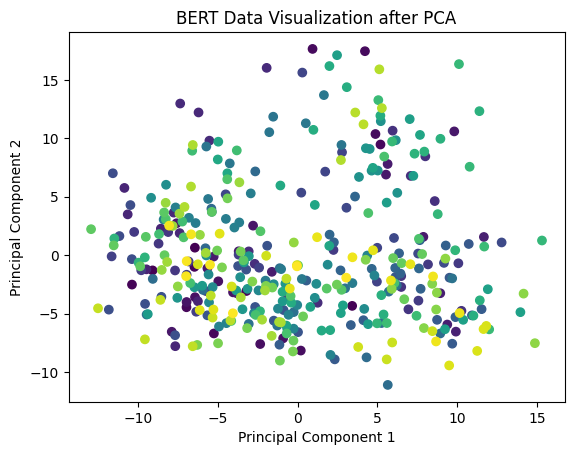

In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)  # Specify the number of components you want to reduce to
reduced_BERT = pca.fit_transform(standardized_BERT)

plt.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], c=labelsSentences)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('BERT Data Visualization after PCA')
plt.show()

## FMRI

### Examine the explained variance ratio to determine the number of components that capture a significant amount of the variance in the data

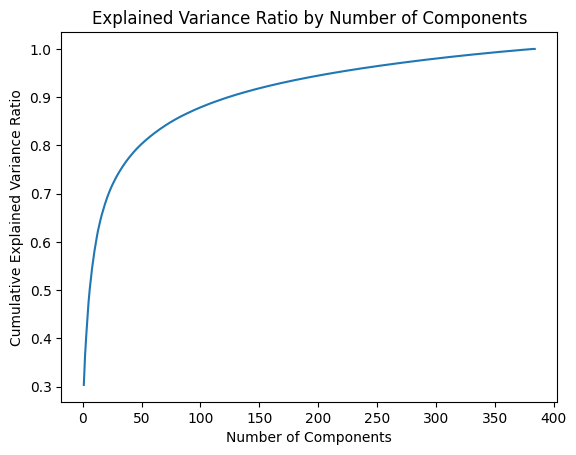

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(fMRI_data)

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

When interpreting the cumulative explained variance ratio plot in PCA, higher values are generally better. The plot shows the cumulative amount of variance explained by each additional principal component.

The x-axis represents the number of components, and the y-axis represents the cumulative explained variance ratio. The cumulative explained variance ratio tells the proportion of the total variance in the data that is explained by the corresponding number of components.

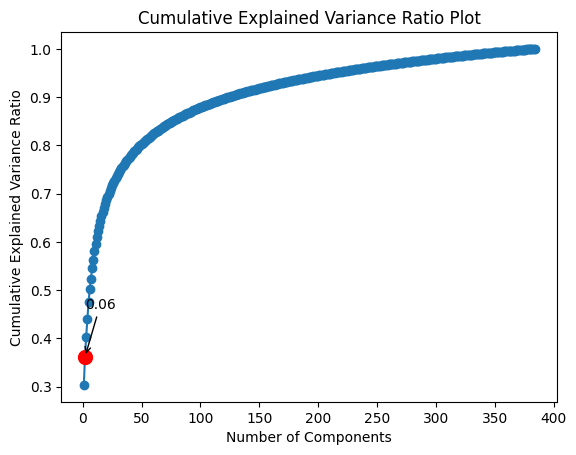

In [ ]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio),
         marker='o', linestyle='-')

# Find the elbow point or plateau
elbow_index = find_elbow_point(explained_variance_ratio)

# Add a marker at the elbow point
plt.plot(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index],
         marker='o', markersize=10, color='red')

# Display the value of the explained variance ratio at the marker point
explained_variance_ratio_at_elbow = explained_variance_ratio[elbow_index]
plt.annotate(f'{explained_variance_ratio_at_elbow:.2f}',
             xy=(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index]),
             xytext=(elbow_index + 1, np.cumsum(explained_variance_ratio)[elbow_index] + 0.1),
             arrowprops=dict(arrowstyle='->'))

# Customize the plot labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')

# Show the plot
plt.show()

### Number of Components for the FMRI PCA = 3

In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)  # Specify the number of components you want to reduce to
reduced_FMRI = pca.fit_transform(fMRI_data)

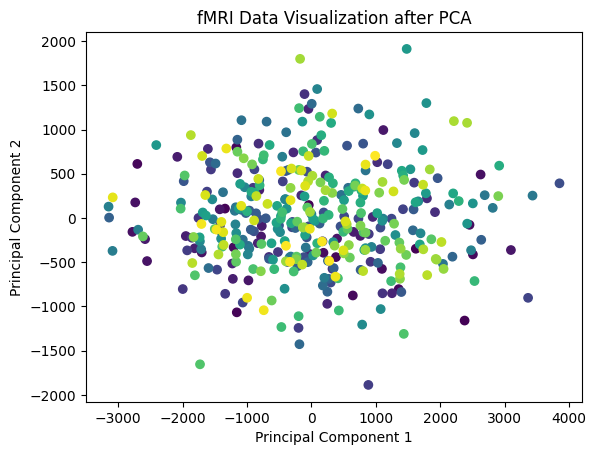

In [ ]:
plt.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], c=labelsSentences)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('fMRI Data Visualization after PCA')
plt.show()

# Clustering Analysis

##  t-SNE and UMAP

In [ ]:
# 2D
tsne = TSNE(n_components=2, random_state=42)

umap = UMAP(n_components=2, random_state=42)

In [ ]:
# 3D
tsne_3d = TSNE(n_components=3, random_state=42)

umap_3d = UMAP(n_components=3, random_state=42)

### BERT

In [ ]:
# Using t-SNE
BERT_data_tsne = tsne.fit_transform(reduced_BERT)

# Using UMAP
BERT_data_umap = umap.fit_transform(reduced_BERT)

In [ ]:
# Perform t-SNE in 3D
BERT_data_tsne_3d = tsne_3d.fit_transform(reduced_BERT)

# Perform UMAP in 3D
BERT_data_umap_3d = umap_3d.fit_transform(reduced_BERT)

### FMRI

In [ ]:
# Using t-SNE
fMRI_data_tsne = tsne.fit_transform(reduced_FMRI)

# Using UMAP
fMRI_data_umap = umap.fit_transform(reduced_FMRI)

In [ ]:
# Perform t-SNE in 3D
fMRI_data_tsne_3d = tsne_3d.fit_transform(reduced_FMRI)

# Perform UMAP in 3D
fMRI_data_umap_3d = umap_3d.fit_transform(reduced_FMRI)

## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### BERT

In [ ]:
BERT_k_agg = 8  # Specify the number of clusters you want to create
BERT_agg_clustering = AgglomerativeClustering(n_clusters=BERT_k_agg)

In [ ]:
BERT_clusters_agg = BERT_agg_clustering.fit_predict(reduced_BERT)

In [ ]:
# Compute the silhouette score
BERT_silhouette_avg_agg = silhouette_score(reduced_BERT, BERT_clusters_agg)

print("Silhouette Score:", BERT_silhouette_avg_agg)

Silhouette Score: 0.2888668


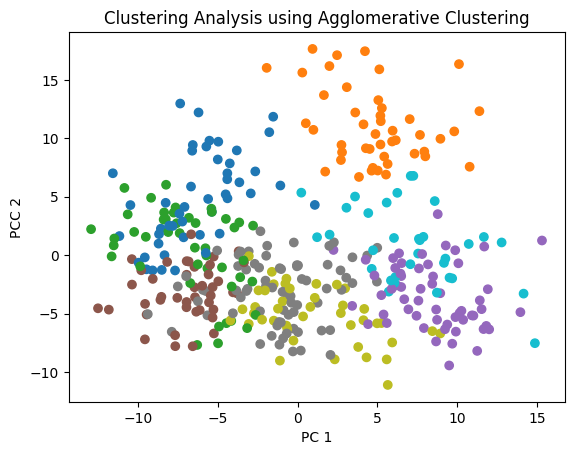

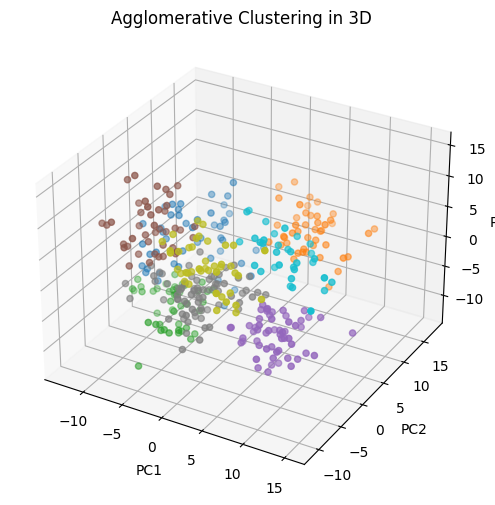

In [ ]:
# visualize clusters in 2D
plt.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], c=BERT_clusters_agg, cmap='tab10')
plt.xlabel('PC 1')
plt.ylabel('PCC 2')
plt.title('Clustering Analysis using Agglomerative Clustering')
plt.show()

# visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], reduced_BERT[:, 2], c=BERT_clusters_agg, cmap='tab10')
ax.set_title('Agglomerative Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

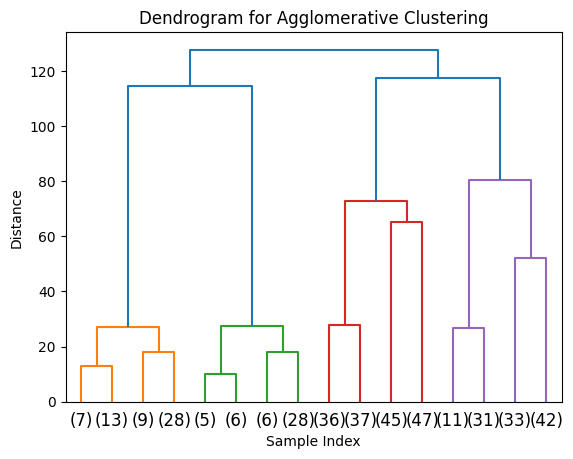

In [ ]:
# Plot dendrogram
# Compute linkage matrix
linkage_matrix = linkage(reduced_BERT, method='ward')
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)

plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

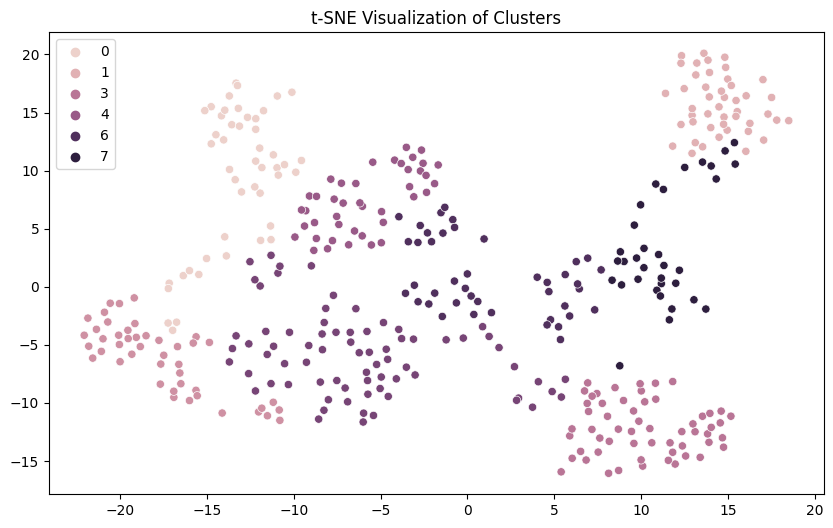

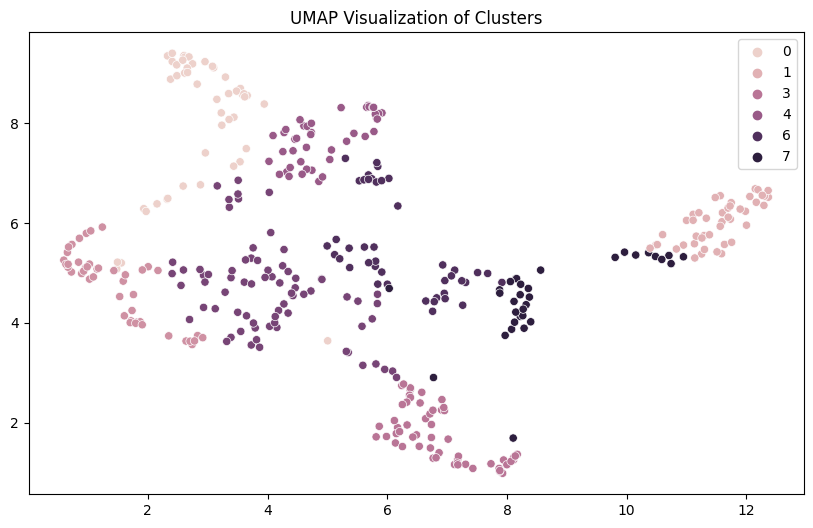

In [ ]:
# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BERT_data_tsne[:, 0], y=BERT_data_tsne[:, 1], hue=BERT_clusters_agg)
plt.title('t-SNE Visualization of Clusters')
plt.show()

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BERT_data_umap[:, 0], y=BERT_data_umap[:, 1], hue=BERT_clusters_agg)
plt.title('UMAP Visualization of Clusters')
plt.show()

In [ ]:
# Plot t-SNE visualization in 3D
fig = px.scatter_3d(
    x=BERT_data_tsne_3d[:, 0], y=BERT_data_tsne_3d[:, 1], z=BERT_data_tsne_3d[:, 2],
    color=BERT_clusters_agg, opacity=0.7
)
fig.update_layout(title='t-SNE 3D Visualization of Clusters')
fig.show()

# Plot UMAP visualization in 3D
fig = px.scatter_3d(
    x=BERT_data_umap_3d[:, 0], y=BERT_data_umap_3d[:, 1], z=BERT_data_umap_3d[:, 2],
    color=BERT_clusters_agg, opacity=0.7
)
fig.update_layout(title='UMAP 3D Visualization of Clusters')
fig.show()

### FMRI

In [ ]:
FMRI_k_agg = 2  # Specify the number of clusters you want to create
FMRI_agg_clustering = AgglomerativeClustering(n_clusters=FMRI_k_agg)

In [ ]:
FMRI_clusters_agg = FMRI_agg_clustering.fit_predict(reduced_FMRI)

In [ ]:
# Compute the silhouette score
FMRI_silhouette_avg_agg = silhouette_score(reduced_FMRI, FMRI_clusters_agg)

print("Silhouette Score:", FMRI_silhouette_avg_agg)

Silhouette Score: 0.38749023436128144


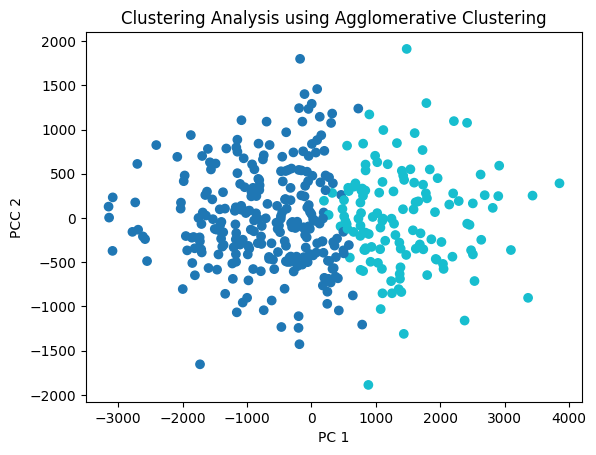

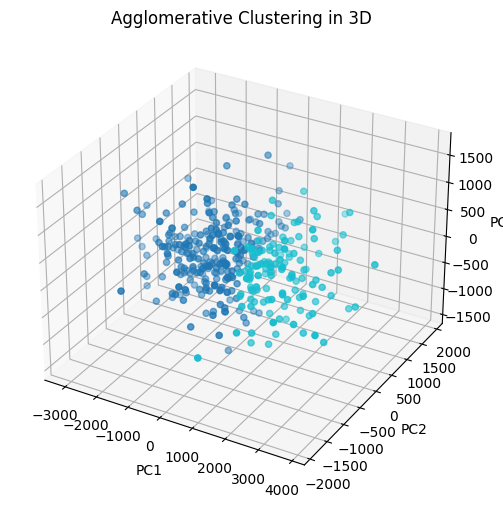

In [ ]:
# visualize clusters in 2D
plt.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], c=FMRI_clusters_agg, cmap='tab10')
plt.xlabel('PC 1')
plt.ylabel('PCC 2')
plt.title('Clustering Analysis using Agglomerative Clustering')
plt.show()

# visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], reduced_FMRI[:, 2], c=FMRI_clusters_agg, cmap='tab10')
ax.set_title('Agglomerative Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

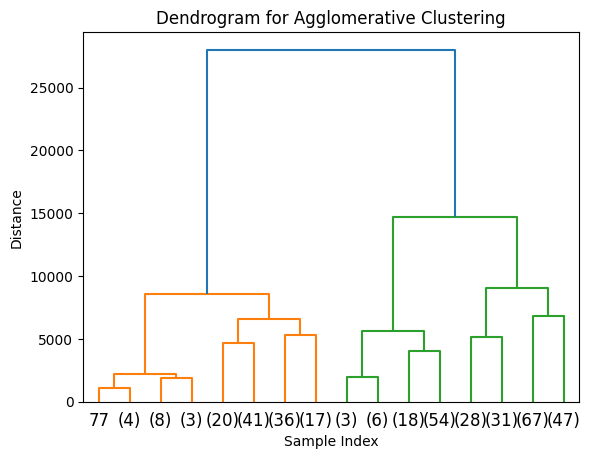

In [ ]:
# Plot dendrogram
# Compute linkage matrix
linkage_matrix = linkage(reduced_FMRI, method='ward')
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)

plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


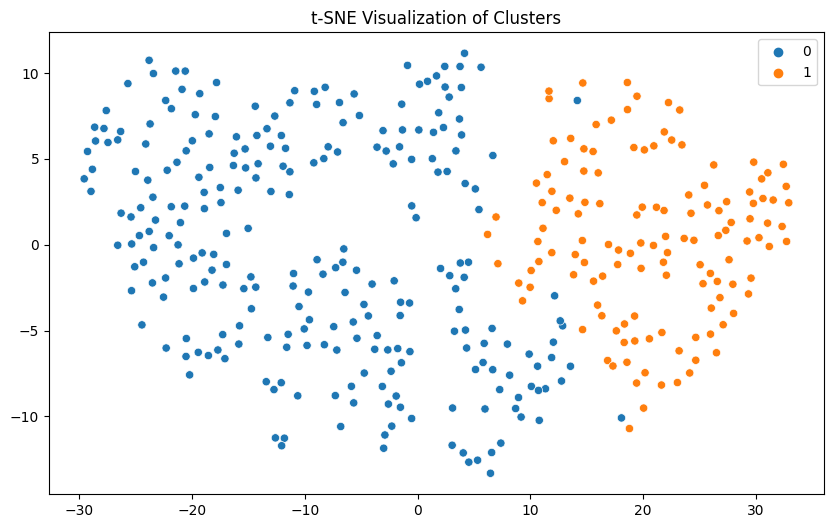

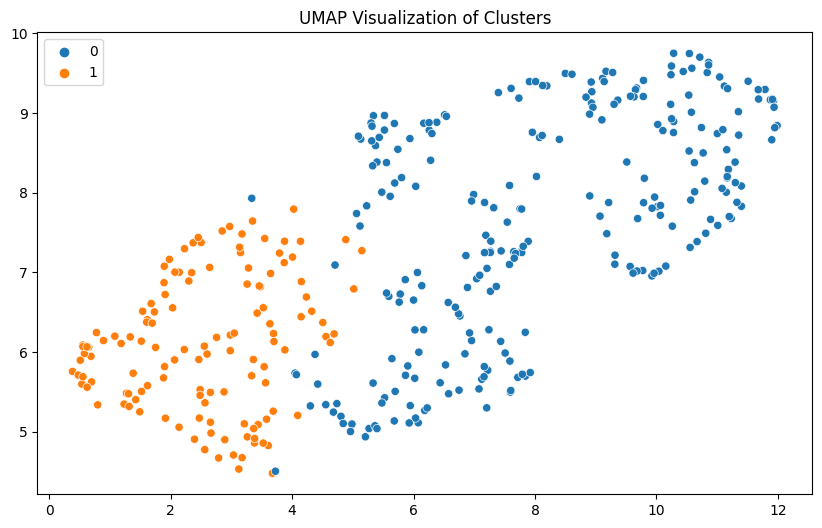

In [ ]:
# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fMRI_data_tsne[:, 0], y=fMRI_data_tsne[:, 1], hue=FMRI_clusters_agg)
plt.title('t-SNE Visualization of Clusters')
plt.show()

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fMRI_data_umap[:, 0], y=fMRI_data_umap[:, 1], hue=FMRI_clusters_agg)
plt.title('UMAP Visualization of Clusters')
plt.show()

In [ ]:
# Plot t-SNE visualization in 3D
fig = px.scatter_3d(
    x=fMRI_data_tsne_3d[:, 0], y=fMRI_data_tsne_3d[:, 1], z=fMRI_data_tsne_3d[:, 2],
    color=FMRI_clusters_agg, opacity=0.7
)
fig.update_layout(title='t-SNE 3D Visualization of Clusters')
fig.show()

# Plot UMAP visualization in 3D
fig = px.scatter_3d(
    x=fMRI_data_umap_3d[:, 0], y=fMRI_data_umap_3d[:, 1], z=fMRI_data_umap_3d[:, 2],
    color=FMRI_clusters_agg, opacity=0.7
)
fig.update_layout(title='UMAP 3D Visualization of Clusters')
fig.show()

## KMeans

In [ ]:
from sklearn.cluster import KMeans

### BERT

In [ ]:
# Perform K-means clustering
BERT_k_kmeans = 8  # Specify the number of clusters you want to create
BERT_kmeans = KMeans(n_clusters=BERT_k_kmeans)

In [ ]:
BERT_clusters_kmeans = BERT_kmeans.fit_predict(reduced_BERT)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Compute the silhouette score
FMRI_silhouette_avg_kmeans = silhouette_score(reduced_BERT, BERT_clusters_kmeans)

print("Silhouette Score:", FMRI_silhouette_avg_kmeans)

Silhouette Score: 0.32219082


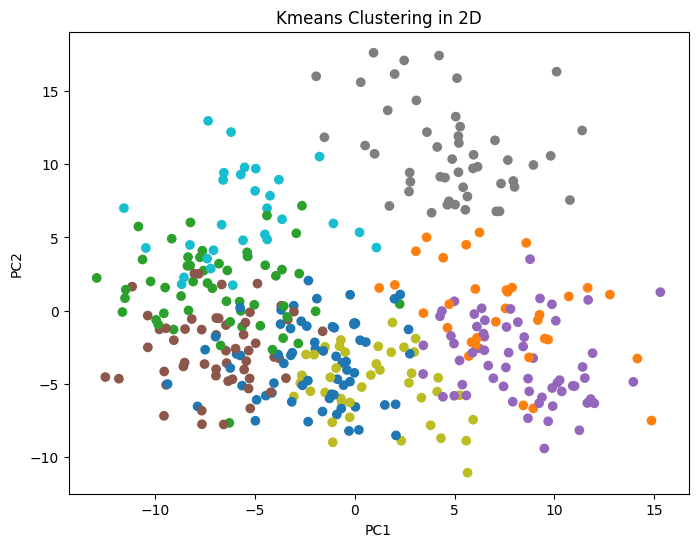

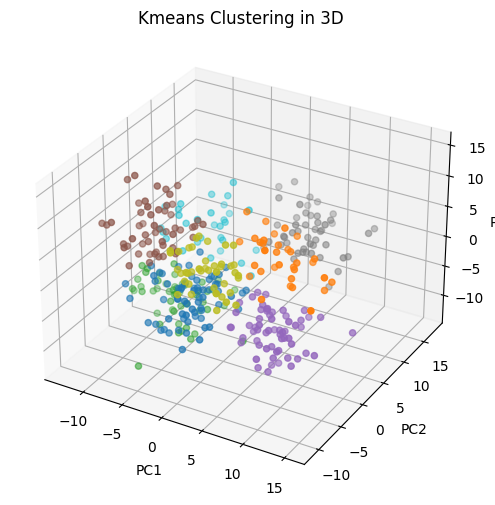

In [ ]:
# visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], c=BERT_clusters_kmeans, cmap='tab10')
plt.title('Kmeans Clustering in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], reduced_BERT[:, 2], c=BERT_clusters_kmeans, cmap='tab10')
ax.set_title('Kmeans Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

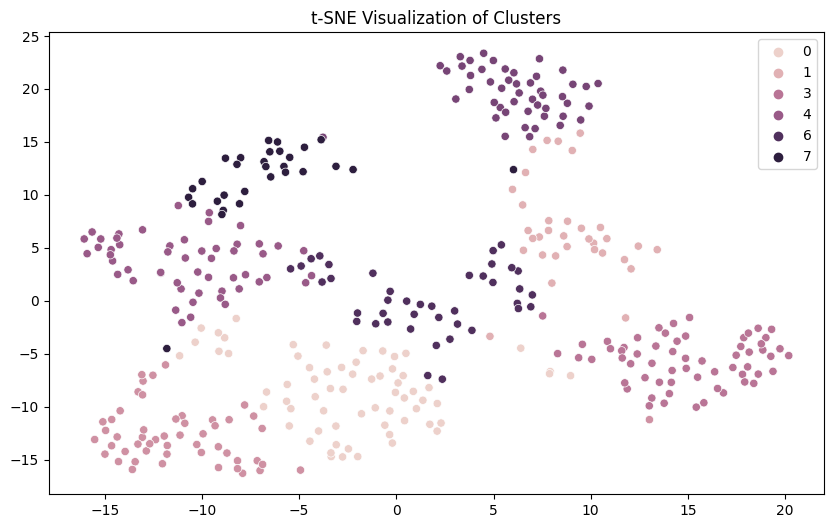

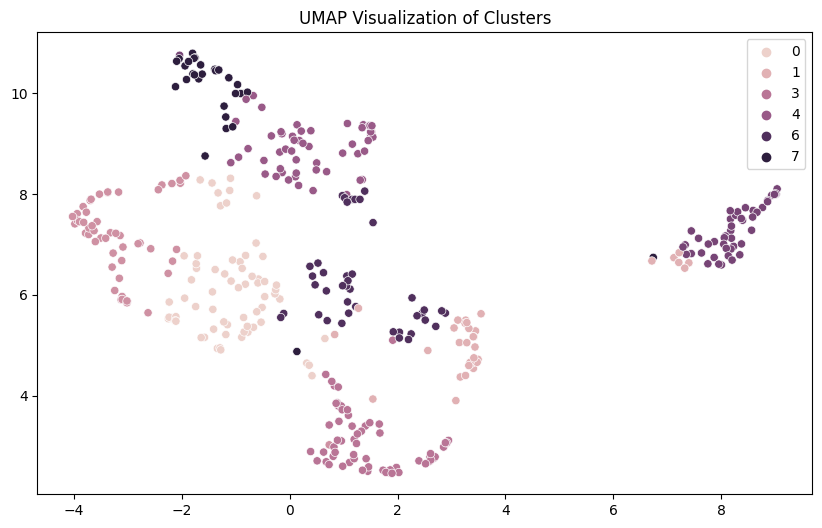

In [ ]:
# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BERT_data_tsne[:, 0], y=BERT_data_tsne[:, 1], hue=BERT_clusters_kmeans)
plt.title('t-SNE Visualization of Clusters')
plt.show()

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BERT_data_umap[:, 0], y=BERT_data_umap[:, 1], hue=BERT_clusters_kmeans)
plt.title('UMAP Visualization of Clusters')
plt.show()

In [ ]:
# Plot t-SNE visualization in 3D
fig = px.scatter_3d(
    x=BERT_data_tsne_3d[:, 0], y=BERT_data_tsne_3d[:, 1], z=BERT_data_tsne_3d[:, 2],
    color=BERT_clusters_kmeans, opacity=0.7
)
fig.update_layout(title='t-SNE 3D Visualization of Clusters')
fig.show()

# Plot UMAP visualization in 3D
fig = px.scatter_3d(
    x=BERT_data_umap_3d[:, 0], y=BERT_data_umap_3d[:, 1], z=BERT_data_umap_3d[:, 2],
    color=BERT_clusters_kmeans, opacity=0.7
)
fig.update_layout(title='UMAP 3D Visualization of Clusters')
fig.show()

### FMRI

In [ ]:
# Perform K-means clustering
FMRI_k_kmeans = 2  # Specify the number of clusters you want to create
FMRI_kmeans = KMeans(n_clusters=FMRI_k_kmeans)

In [ ]:
FMRI_clusters_kmeans = FMRI_kmeans.fit_predict(reduced_FMRI)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Compute the silhouette score
FMRI_silhouette_avg_kmeans = silhouette_score(reduced_FMRI, FMRI_clusters_kmeans)

print("Silhouette Score:", FMRI_silhouette_avg_kmeans)

Silhouette Score: 0.3933224030759028


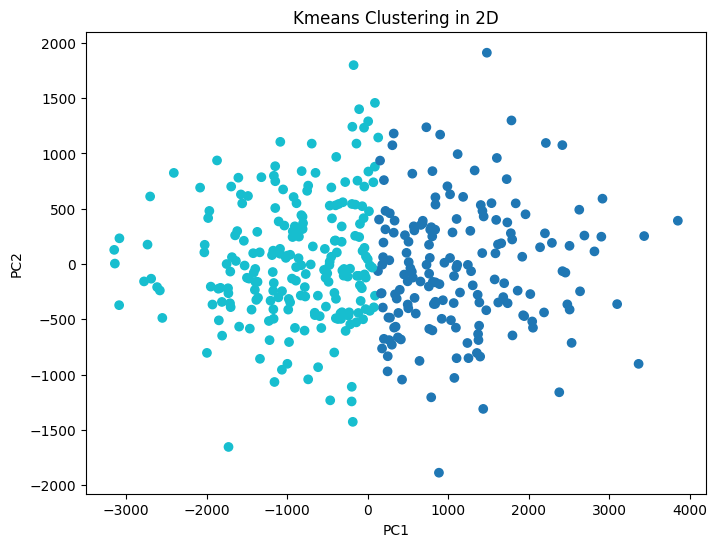

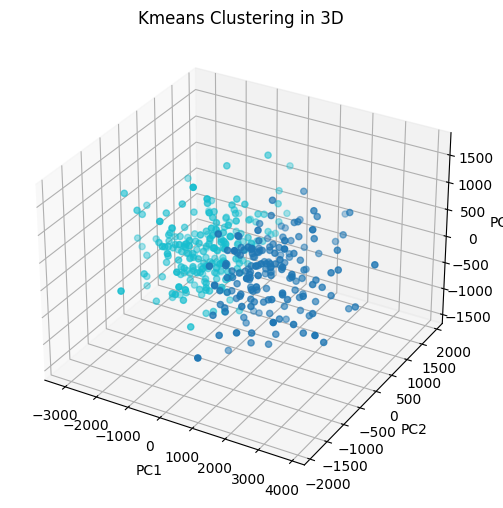

In [ ]:
# visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], c=FMRI_clusters_kmeans, cmap='tab10')
plt.title('Kmeans Clustering in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], reduced_FMRI[:, 2], c=FMRI_clusters_kmeans, cmap='tab10')
ax.set_title('Kmeans Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

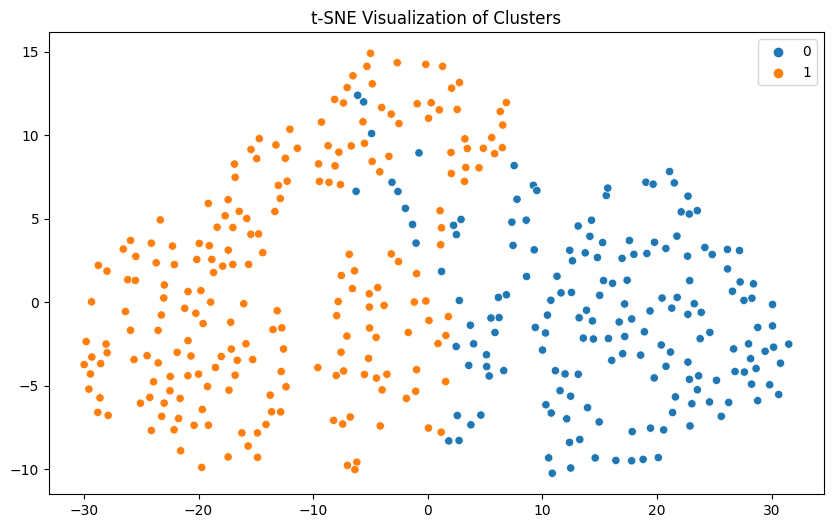

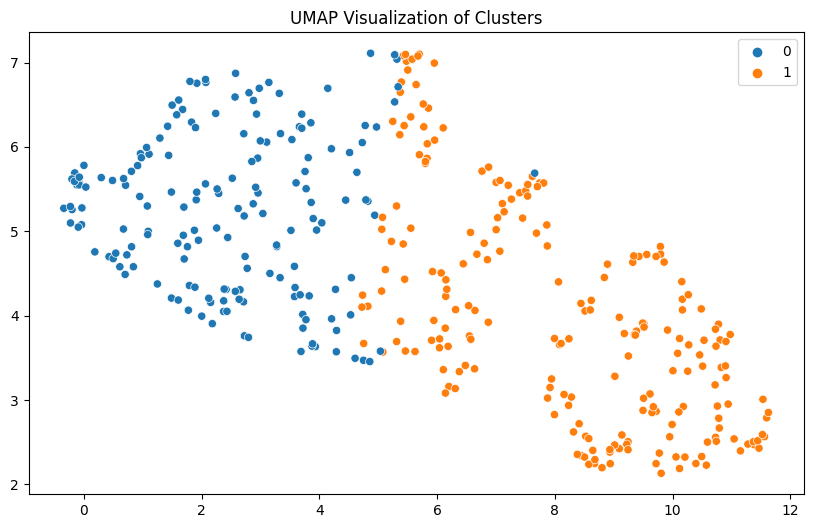

In [ ]:
# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fMRI_data_tsne[:, 0], y=fMRI_data_tsne[:, 1], hue=FMRI_clusters_kmeans)
plt.title('t-SNE Visualization of Clusters')
plt.show()

# Plot UMAP visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fMRI_data_umap[:, 0], y=fMRI_data_umap[:, 1], hue=FMRI_clusters_kmeans)
plt.title('UMAP Visualization of Clusters')
plt.show()

In [ ]:
# Plot t-SNE visualization in 3D
fig = px.scatter_3d(
    x=fMRI_data_tsne_3d[:, 0], y=fMRI_data_tsne_3d[:, 1], z=fMRI_data_tsne_3d[:, 2],
    color=FMRI_clusters_kmeans, opacity=0.7
)
fig.update_layout(title='t-SNE 3D Visualization of Clusters')
fig.show()

# Plot UMAP visualization in 3D
fig = px.scatter_3d(
    x=fMRI_data_umap_3d[:, 0], y=fMRI_data_umap_3d[:, 1], z=fMRI_data_umap_3d[:, 2],
    color=FMRI_clusters_kmeans, opacity=0.7
)
fig.update_layout(title='UMAP 3D Visualization of Clusters')
fig.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

### BERT


In [ ]:
# Perform DBSCAN clustering
eps_bert = 0.5  # maximum distance between samples
min_samples_bert = 5  # minimum number of samples

In [ ]:
dbscan_bert = DBSCAN(eps=eps_bert, min_samples=min_samples_bert)
BERT_clusters_dbscan = dbscan_bert.fit_predict(reduced_BERT)

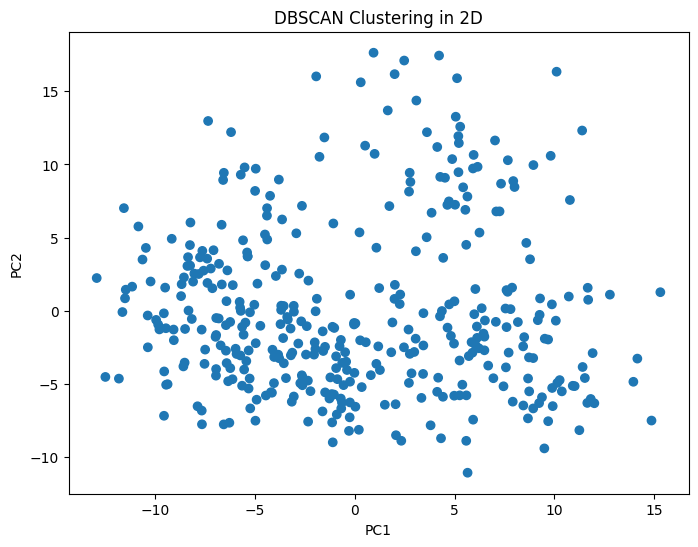

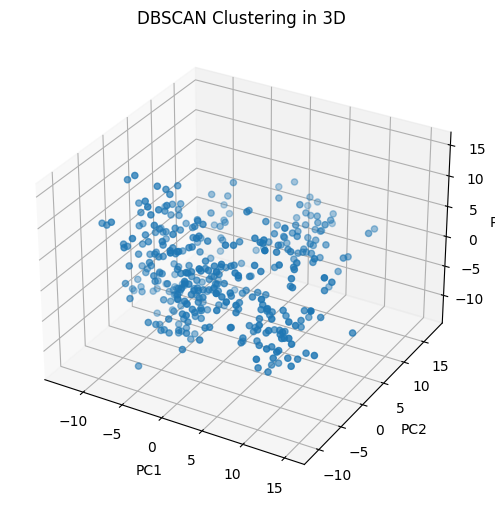

In [ ]:
# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], c=BERT_clusters_dbscan, cmap='tab10')
plt.title('DBSCAN Clustering in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_BERT[:, 0], reduced_BERT[:, 1], reduced_BERT[:, 2], c=BERT_clusters_dbscan, cmap='tab10')
ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### FMRI

In [ ]:
# Perform DBSCAN clustering
eps_fmri = 0.5  # maximum distance between samples
min_samples_fmri = 5  # minimum number of samples

In [ ]:
dbscan_fmri = DBSCAN(eps=eps_fmri, min_samples=min_samples_fmri)
FMRI_clusters_dbscan = dbscan_fmri.fit_predict(reduced_FMRI)

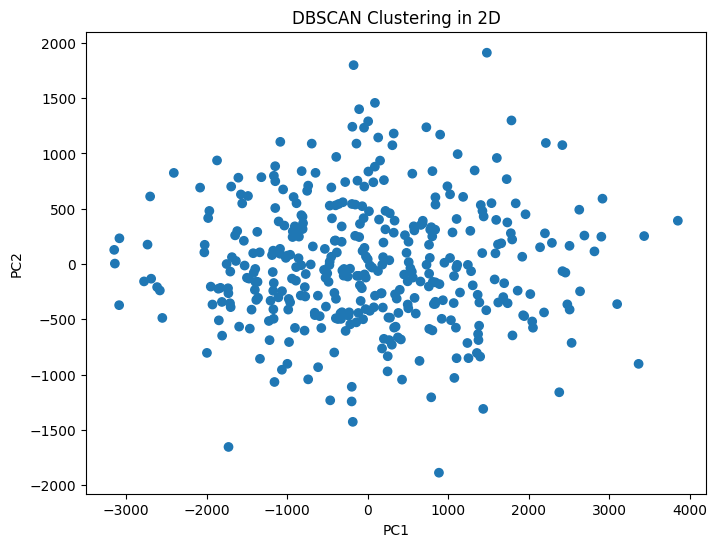

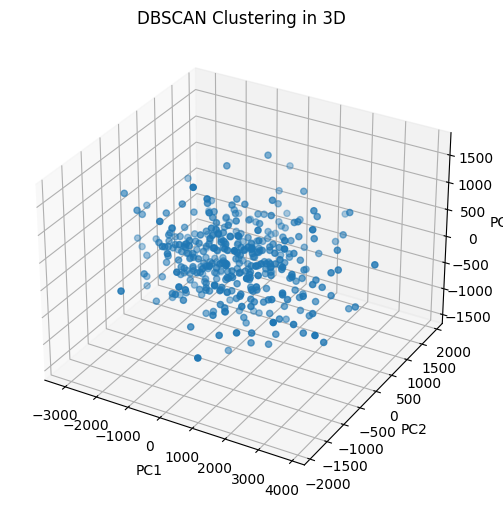

In [ ]:
# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], c=FMRI_clusters_dbscan, cmap='tab10')
plt.title('DBSCAN Clustering in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_FMRI[:, 0], reduced_FMRI[:, 1], reduced_FMRI[:, 2], c=FMRI_clusters_dbscan, cmap='tab10')
ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Results

Based on the given plots and silhouette scores, we can conclude the following:

1. Agglomerative Clustering:
For BERT, the best silhouette score was obtained with k=8, achieving a score of 0.2889. The visual clusters were not distinct, and the dendrogram showed 4 different colors.
For fMRI, the best silhouette score was obtained with k=2, achieving a score of 0.3875. The visual clusters were 2 connected distinct clusters, and the dendrogram showed 2 different colors.

2. K-means Clustering:
For BERT, the best silhouette score was obtained with k=8, achieving a score of 0.3223. The visual clusters were 8 connected but not distinct, indicating overlapping clusters.
For fMRI, the best silhouette score was obtained with k=2, achieving a score of 0.3935. The visual clusters were 2 connected distinct clusters.

3. The similar silhouette scores between K-means and Agglomerative clustering suggest that both algorithms perform similarly in terms of the quality of clustering.

4. The finding that the algorithm performed better with PCA and poorly with DBSCAN indicates that the data may be more amenable to linear transformations and compact cluster structures rather than density-based clustering. This suggests that there may be a clear underlying hierarchical structure in the semantic representations within the brain, which can be captured by dimensionality reduction techniques like PCA.

Given the research question of uncovering semantic hierarchies and exploring the hierarchical structure of semantic representations while comparing between BERT representations and fMRI data, the findings align well. The similar silhouette scores across K-means, Agglomerative clustering, and DBSCAN indicate the presence of consistent clustering patterns that can potentially reveal different levels of abstraction or semantic categories. The better performance with PCA in both BERT and fMRI data suggests that dimensionality reduction techniques can effectively uncover the underlying semantic hierarchies. This indicates that both BERT representations and fMRI data capture meaningful information related to the hierarchical structure of semantic representations, and comparing their clustering results can provide valuable insights into the similarities and differences in their representations of semantic hierarchies.

# Cluster interpretation in the context of semantics

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

## Calculate semantic similarity:

Measure the semantic similarity or dissimilarity between the stimuli/sentences within and between clusters.

### BERT

In [ ]:
# Calculate semantic similarity matrix
similarity_matrix_BERT = cosine_similarity(reduced_BERT)

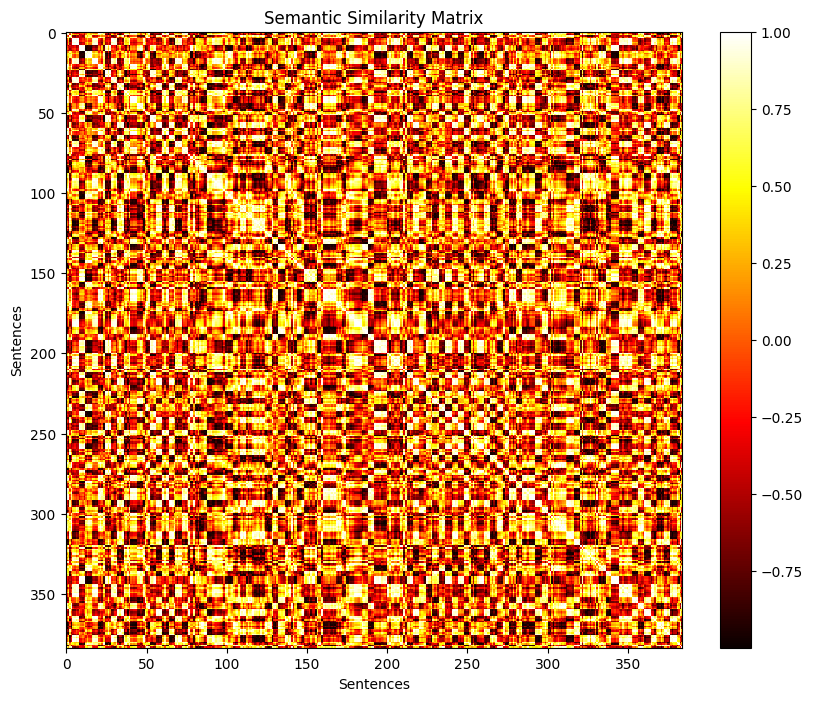

In [ ]:
# Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix_BERT, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Semantic Similarity Matrix')
plt.xlabel('Sentences')
plt.ylabel('Sentences')
plt.show()

### FMRI

In [ ]:
# Calculate semantic similarity matrix
similarity_matrix_FMRI = cosine_similarity(reduced_FMRI)

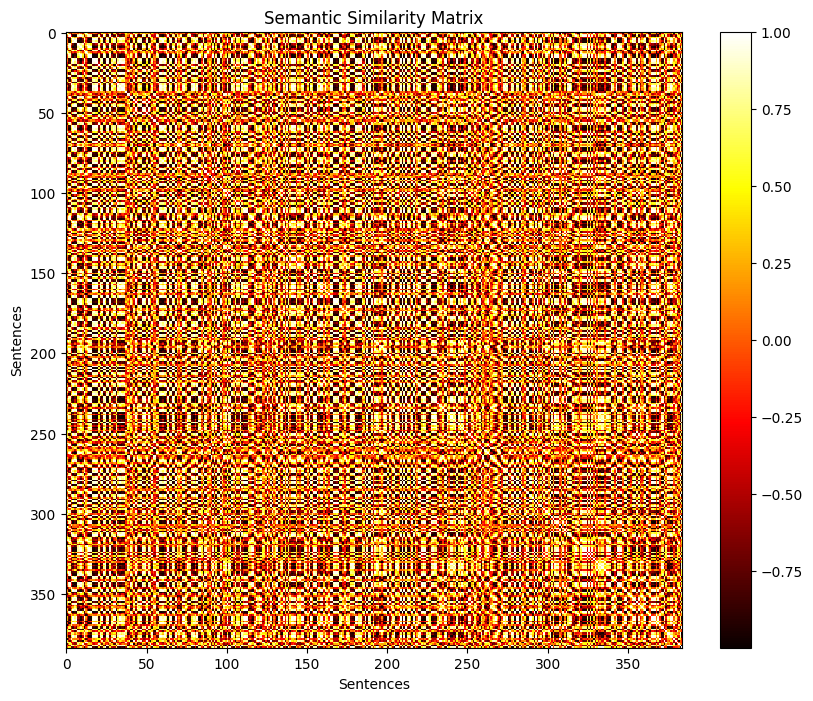

In [ ]:
# Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix_FMRI, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Semantic Similarity Matrix')
plt.xlabel('Sentences')
plt.ylabel('Sentences')
plt.show()

## Visualize semantic relationships

Visualize the semantic relationships between stimuli/sentences within clusters.

### BERT

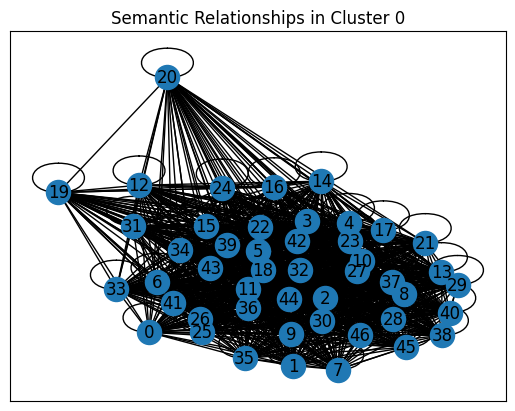

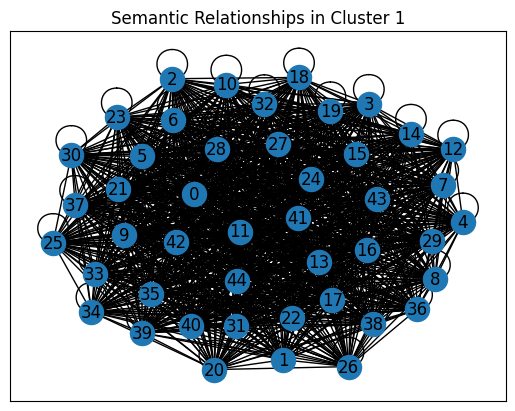

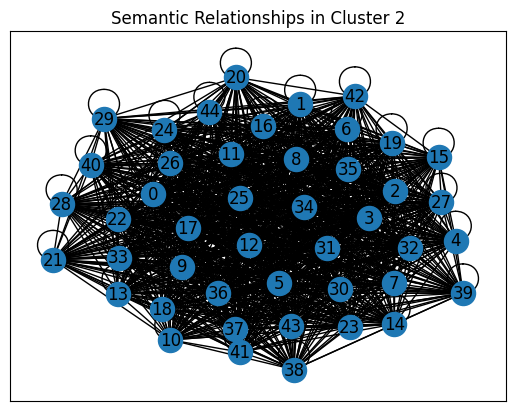

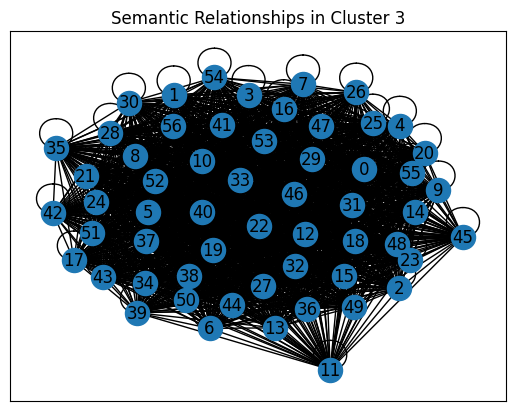

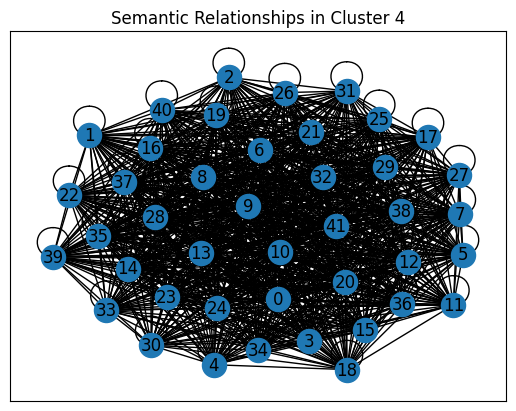

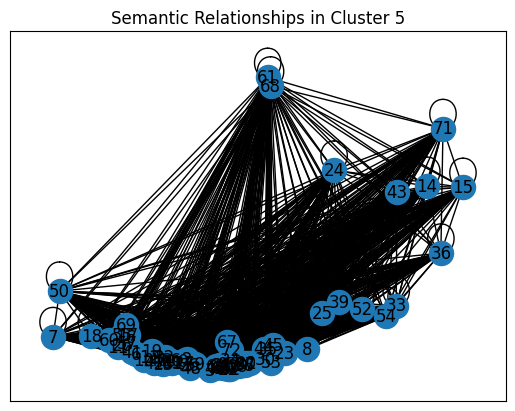

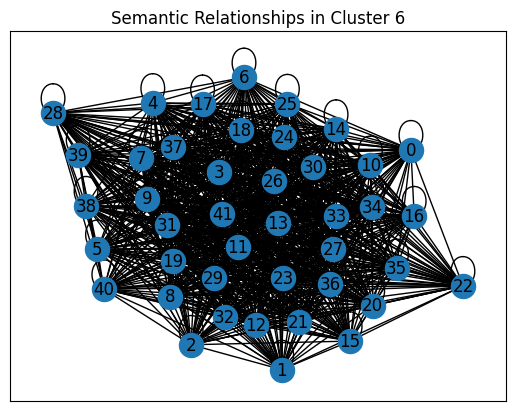

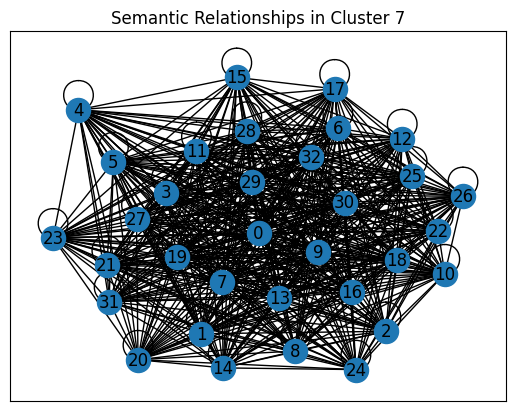

In [ ]:
# Visualize semantic relationships within clusters
for cluster in np.unique(BERT_clusters_agg):
    cluster_indices = np.where(BERT_clusters_agg == cluster)[0]
    cluster_semantic_similarity = similarity_matrix_BERT[cluster_indices][:, cluster_indices]

    # Create network graph for the cluster
    graph = nx.from_numpy_array(cluster_semantic_similarity)

    # Visualize the network graph
    plt.figure()
    nx.draw_networkx(graph)
    plt.title(f"Semantic Relationships in Cluster {cluster}")
    plt.show()

### FMRI

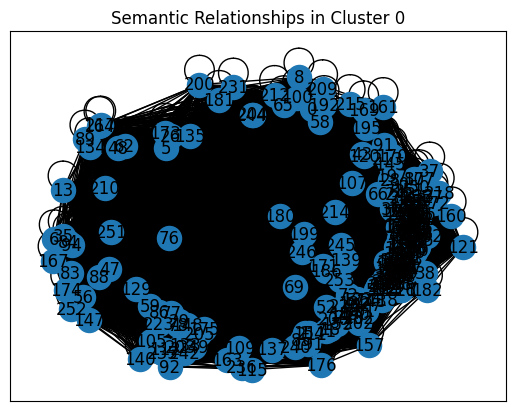

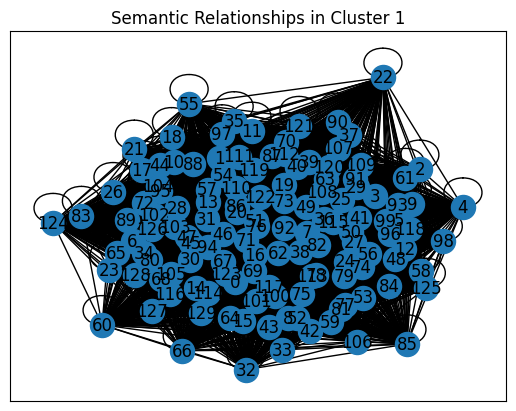

In [ ]:
# Visualize semantic relationships within clusters
for cluster in np.unique(FMRI_clusters_agg):
    cluster_indices = np.where(FMRI_clusters_agg == cluster)[0]
    cluster_semantic_similarity = similarity_matrix_FMRI[cluster_indices][:, cluster_indices]

    # Create network graph for the cluster
    graph = nx.from_numpy_array(cluster_semantic_similarity)

    # Visualize the network graph
    plt.figure()
    nx.draw_networkx(graph)
    plt.title(f"Semantic Relationships in Cluster {cluster}")
    plt.show()

## Cluster coherence analysis

Evaluate the coherence of clusters in terms of semantic similarity. Analyze whether the stimuli/sentences within the same cluster are more semantically similar to each other compared to stimuli/sentences from different clusters.

### BERT

In [ ]:
# Evaluate cluster coherence
within_cluster_sim_BERT  = []
between_cluster_sim_BERT  = []
for cluster in np.unique(BERT_clusters_agg):
    cluster_indices = np.where(BERT_clusters_agg == cluster)[0]
    cluster_semantic_similarity = similarity_matrix_BERT[cluster_indices][:, cluster_indices]

    # Calculate average semantic similarity within the cluster
    avg_within_cluster_similarity = np.mean(cluster_semantic_similarity)

    # Calculate average semantic similarity between clusters
    other_cluster_indices = np.where(BERT_clusters_agg != cluster)[0]
    avg_between_cluster_similarity = np.mean(similarity_matrix_BERT[cluster_indices][:, other_cluster_indices])

    print(f"BERT:")
    print(f"Cluster {cluster}:")
    print("Average within-cluster similarity:", avg_within_cluster_similarity)
    print("Average between-cluster similarity:", avg_between_cluster_similarity)
    print()
    within_cluster_sim_BERT.append(avg_within_cluster_similarity)
    between_cluster_sim_BERT.append(avg_between_cluster_similarity)

BERT:
Cluster 0:
Average within-cluster similarity: 0.64684665
Average between-cluster similarity: -0.11395606

BERT:
Cluster 1:
Average within-cluster similarity: 0.91277826
Average between-cluster similarity: -0.20267235

BERT:
Cluster 2:
Average within-cluster similarity: 0.853537
Average between-cluster similarity: -0.0959501

BERT:
Cluster 3:
Average within-cluster similarity: 0.8755241
Average between-cluster similarity: -0.14107092

BERT:
Cluster 4:
Average within-cluster similarity: 0.8989388
Average between-cluster similarity: -0.07669337

BERT:
Cluster 5:
Average within-cluster similarity: 0.3975381
Average between-cluster similarity: -0.03923107

BERT:
Cluster 6:
Average within-cluster similarity: 0.7631969
Average between-cluster similarity: -0.049415443

BERT:
Cluster 7:
Average within-cluster similarity: 0.76658136
Average between-cluster similarity: -0.102402605



### FMRI

In [ ]:
# Evaluate cluster coherence
within_cluster_sim_FMRI  = []
between_cluster_sim_FMRI  = []
for cluster in np.unique(FMRI_clusters_agg):
    cluster_indices = np.where(FMRI_clusters_agg == cluster)[0]
    cluster_semantic_similarity = similarity_matrix_FMRI[cluster_indices][:, cluster_indices]

    # Calculate average semantic similarity within the cluster
    avg_within_cluster_similarity = np.mean(cluster_semantic_similarity)

    # Calculate average semantic similarity between clusters
    other_cluster_indices = np.where(FMRI_clusters_agg != cluster)[0]
    avg_between_cluster_similarity = np.mean(similarity_matrix_FMRI[cluster_indices][:, other_cluster_indices])

    print(f"FMRI:")
    print(f"Cluster {cluster}:")
    print("Average within-cluster similarity:", avg_within_cluster_similarity)
    print("Average between-cluster similarity:", avg_between_cluster_similarity)
    print()
    within_cluster_sim_FMRI.append(avg_within_cluster_similarity)
    between_cluster_sim_FMRI.append(avg_between_cluster_similarity)

FMRI:
Cluster 0:
Average within-cluster similarity: 0.23767332925145981
Average between-cluster similarity: -0.42862363282828275

FMRI:
Cluster 1:
Average within-cluster similarity: 0.773146738297403
Average between-cluster similarity: -0.4286236328282827



# Statistical Analysis

## Null hypothesis

The observed mean within-cluster similarity for both BERT representations and fMRI data is not significantly different from random permutations.

## Statistical Tests

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
from sklearn.utils import resample
from statistics import mean, stdev
from math import sqrt

In [ ]:
# Number of permutations
num_permutations = 1000

### BERT

In [ ]:
cluster_labels = BERT_clusters_agg

permuted_test_statistics = []
num_permutations = 1000  # Adjust the number of permutations as desired

# Perform permutation test
for _ in range(num_permutations):
    # Permute the cluster labels
    permuted_labels = resample(cluster_labels, replace=False)

    # Compute test statistic for the permutation
    permuted_mean_similarity = np.mean(similarity_matrix_BERT[np.ix_(permuted_labels, permuted_labels)])
    permuted_test_statistics.append(permuted_mean_similarity)

In [ ]:
# Compute observed test statistic (e.g., mean semantic similarity within clusters)
observed_mean_similarity = np.mean(within_cluster_sim_BERT)

# Calculate p-value
p_value = (np.abs(permuted_test_statistics) >= np.abs(observed_mean_similarity)).mean()

# Print the results
print(f"Observed Mean Within-Cluster Similarity: {observed_mean_similarity:.4f}")
print(f"P-value (Permutation Test): {p_value:.4f}")

# Perform t-test for comparison
t_statistic, t_p_value = ttest_ind(within_cluster_sim_BERT, between_cluster_sim_BERT)

print(f"P-value (t-test): {t_p_value:.4f}")

Observed Mean Within-Cluster Similarity: 0.7644
P-value (Permutation Test): 0.0000
P-value (t-test): 0.0000


### FMRI

In [ ]:
cluster_labels = FMRI_clusters_agg

permuted_test_statistics = []
num_permutations = 1000  # Adjust the number of permutations as desired

# Perform permutation test
for _ in range(num_permutations):
    # Permute the cluster labels
    permuted_labels = resample(cluster_labels, replace=False)

    # Compute test statistic for the permutation
    permuted_mean_similarity = np.mean(similarity_matrix_FMRI[np.ix_(permuted_labels, permuted_labels)])
    permuted_test_statistics.append(permuted_mean_similarity)

In [ ]:
# Compute observed test statistic (e.g., mean semantic similarity within clusters)
observed_mean_similarity = np.mean(within_cluster_sim_FMRI)

# Calculate p-value
p_value = (np.abs(permuted_test_statistics) >= np.abs(observed_mean_similarity)).mean()

# Print the results
print(f"Observed Mean Within-Cluster Similarity: {observed_mean_similarity:.4f}")
print(f"P-value (Permutation Test): {p_value:.4f}")

# Perform t-test for comparison
t_statistic, t_p_value = ttest_ind(within_cluster_sim_FMRI, between_cluster_sim_FMRI)

print(f"P-value (t-test): {t_p_value:.4f}")

Observed Mean Within-Cluster Similarity: 0.5054
P-value (Permutation Test): 1.0000
P-value (t-test): 0.0733


<ipython-input-127-c76dc86b95ca>:12: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Based on the results we got:

BERT:

The observed mean within-cluster similarity for the BERT data was 0.7644. The permutation test resulted in a p-value of 0.0000, indicating that the observed mean similarity is statistically significant compared to permuted values. Similarly, the t-test yielded a p-value of 0.0000, suggesting a significant difference between the within-cluster and between-cluster similarities.
- These findings suggest that the clustering of BERT representations reveals a meaningful and distinct hierarchical structure of semantic representations.



FMRI:

For the fMRI data, the observed mean within-cluster similarity was 0.5054. However, the permutation test resulted in a p-value of 1.0000, indicating that the observed mean similarity is not statistically significant compared to permuted values. The t-test yielded a p-value of 0.0733, suggesting that there may not be a significant difference between the within-cluster and between-cluster similarities.
- These results imply that the clustering of fMRI data may not reveal a distinct hierarchical structure of semantic representations as observed in the BERT data.


## Results

Overall, the statistical tests demonstrate that the uncovering of semantic hierarchies and exploration of the hierarchical structure of semantic representations differ between the BERT representations and fMRI data. The BERT representations exhibit a significant and distinct hierarchical structure, while the fMRI data may not exhibit such clear hierarchical patterns. These findings highlight the importance of considering the specific data modality when studying semantic hierarchies and suggest that BERT representations capture semantic relationships in a more structured manner compared to fMRI data.

# Further Analysis - BERT

## Exploring Subclusters

Identify subclusters within the identified clusters based on clustering algorithms to further divide the clusters into meaningful subgroups.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(subcluster_data):
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(subcluster_data)

    # Calculate average similarity within the subcluster
    avg_similarity = np.mean(similarity_matrix)

    return avg_similarity

In [ ]:
def visualize_data(subcluster_data, main_cluster, subcluster):
    # Scatter plot of data points
    plt.scatter(subcluster_data[:, 0], subcluster_data[:, 1])
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(f"Main Cluster {main_cluster} - Subcluster {subcluster}")
    plt.show()

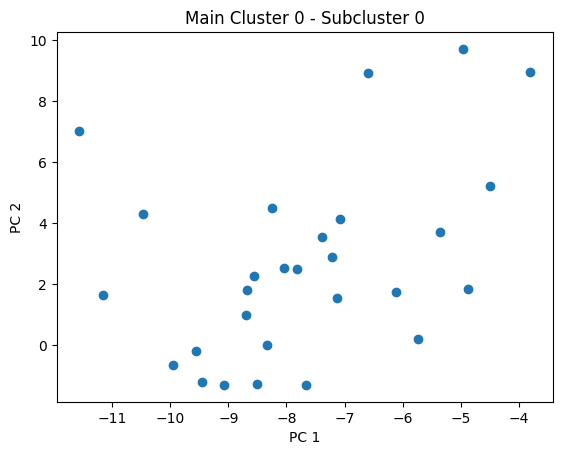

Subcluster 0 in Main Cluster 0:
Number of data points: 28
Average similarity within subcluster: 0.77475417



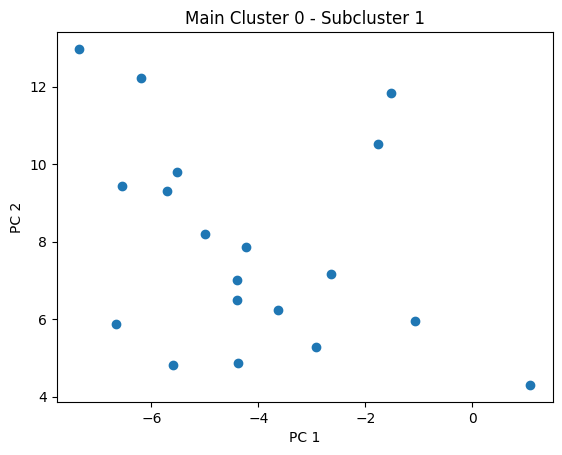

Subcluster 1 in Main Cluster 0:
Number of data points: 19
Average similarity within subcluster: 0.83502054



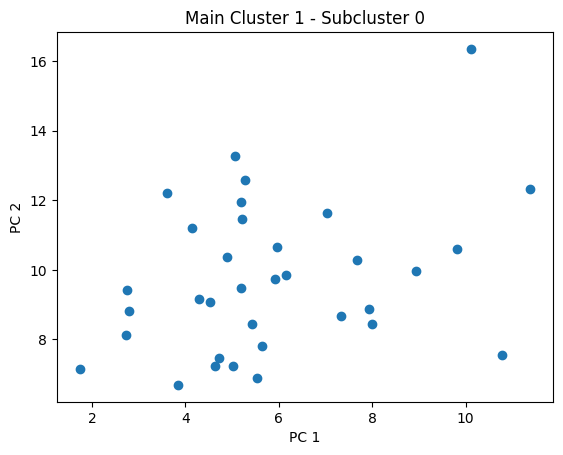

Subcluster 0 in Main Cluster 1:
Number of data points: 34
Average similarity within subcluster: 0.9347321



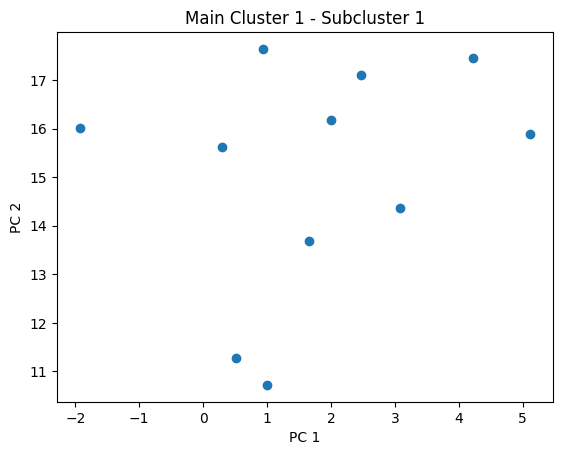

Subcluster 1 in Main Cluster 1:
Number of data points: 11
Average similarity within subcluster: 0.9658915



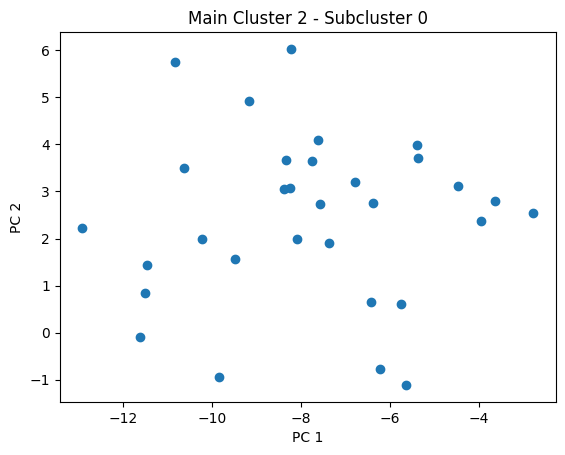

Subcluster 0 in Main Cluster 2:
Number of data points: 31
Average similarity within subcluster: 0.9509322



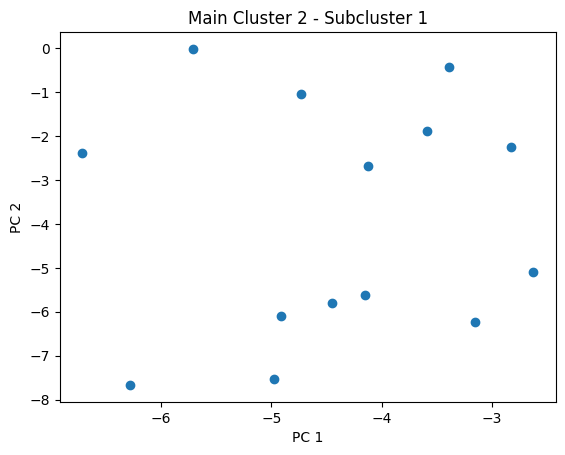

Subcluster 1 in Main Cluster 2:
Number of data points: 14
Average similarity within subcluster: 0.91773194



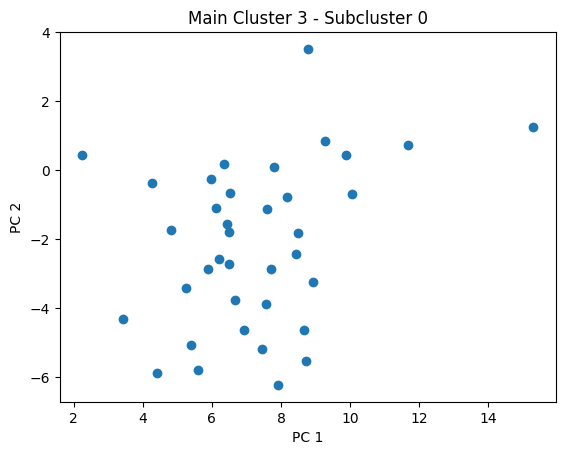

Subcluster 0 in Main Cluster 3:
Number of data points: 37
Average similarity within subcluster: 0.8727373



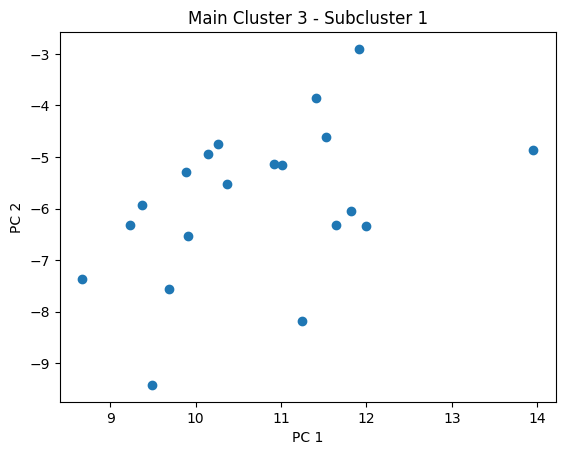

Subcluster 1 in Main Cluster 3:
Number of data points: 20
Average similarity within subcluster: 0.9577143



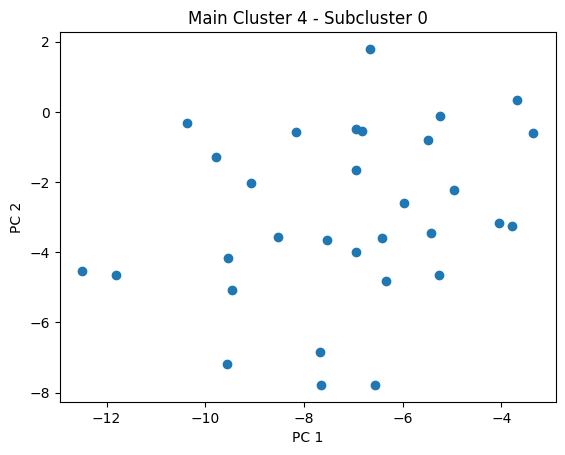

Subcluster 0 in Main Cluster 4:
Number of data points: 31
Average similarity within subcluster: 0.91228664



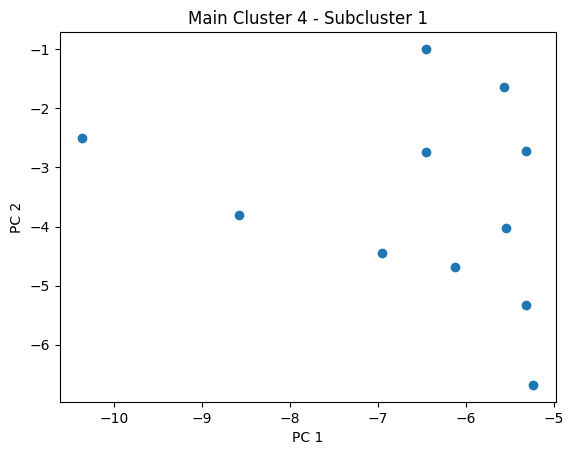

Subcluster 1 in Main Cluster 4:
Number of data points: 11
Average similarity within subcluster: 0.97995573



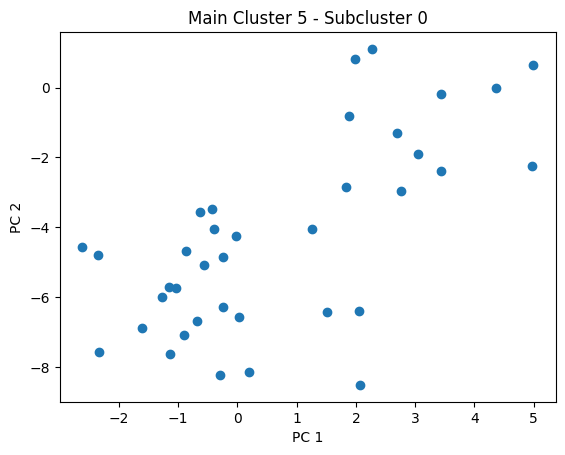

Subcluster 0 in Main Cluster 5:
Number of data points: 37
Average similarity within subcluster: 0.55820656



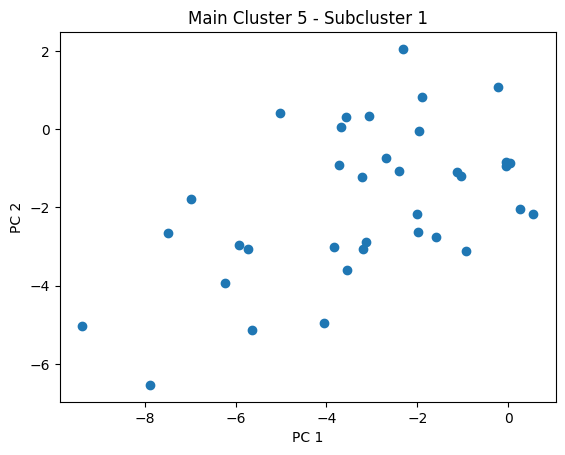

Subcluster 1 in Main Cluster 5:
Number of data points: 36
Average similarity within subcluster: 0.56239396



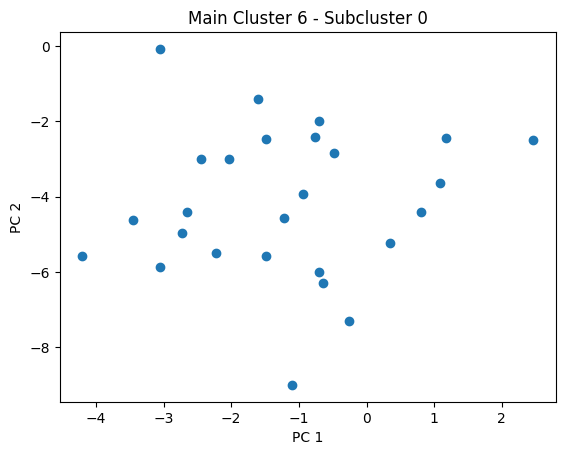

Subcluster 0 in Main Cluster 6:
Number of data points: 26
Average similarity within subcluster: 0.85931903



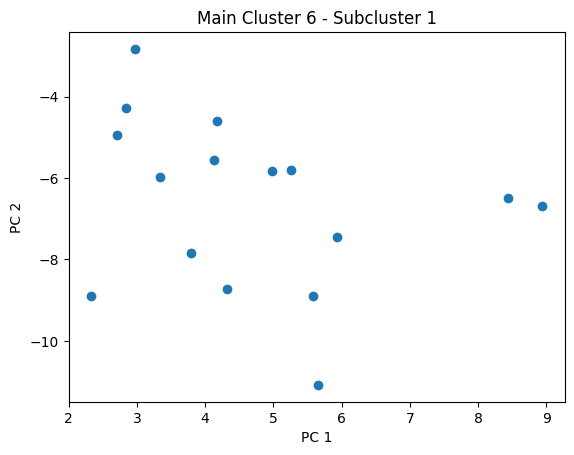

Subcluster 1 in Main Cluster 6:
Number of data points: 16
Average similarity within subcluster: 0.880552



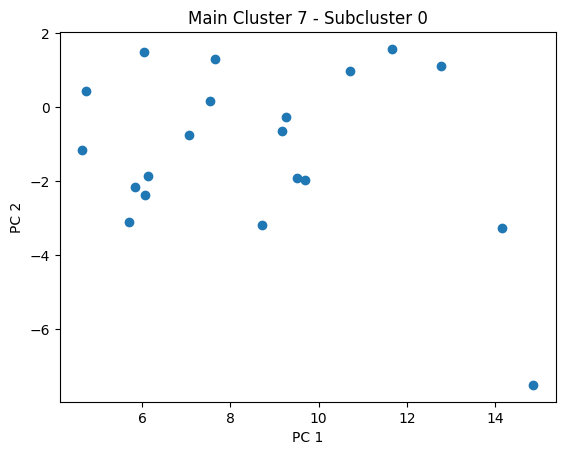

Subcluster 0 in Main Cluster 7:
Number of data points: 20
Average similarity within subcluster: 0.8992967



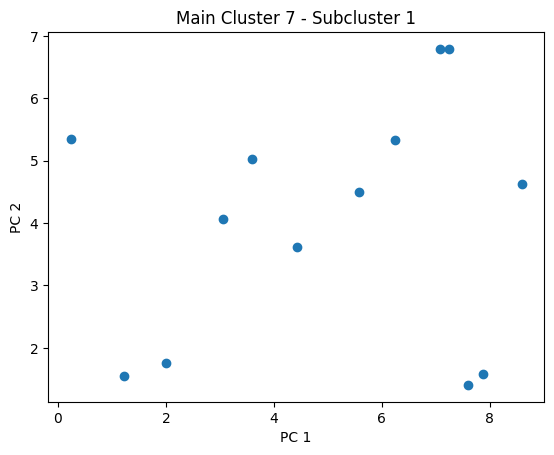

Subcluster 1 in Main Cluster 7:
Number of data points: 13
Average similarity within subcluster: 0.7831586



In [ ]:
# Set the number of desired subclusters
num_subclusters = 2
# Convert clusters_agg and data to lists
clusters_list = list(BERT_clusters_agg)
data_list = list(reduced_BERT)
for selected_cluster in np.unique(BERT_clusters_agg):
    # Select the data points belonging to a specific cluster
    cluster_indices = np.where(clusters_list == selected_cluster)[0]

    # Check if cluster_indices is within the valid range of the data array
    if len(cluster_indices) > 0 and max(cluster_indices) < len(data_list):
        cluster_data = np.array(data_list)[cluster_indices]

        # Apply Agglomarative clustering to the cluster data
        agglo = AgglomerativeClustering(n_clusters=num_subclusters)
        subcluster_labels = agglo.fit_predict(cluster_data)

        for subcluster in range(num_subclusters):
            subcluster_indices = np.where(subcluster_labels == subcluster)[0]
            subcluster_data = cluster_data[subcluster_indices]

            # Perform analysis on the subcluster data
            subcluster_similarity = calculate_similarity(subcluster_data)
            average_similarity = np.mean(subcluster_similarity)

            # Visualize the subcluster data
            visualization = visualize_data(subcluster_data, selected_cluster, subcluster)

            # Print statistics for each subcluster
            print(f"Subcluster {subcluster} in Main Cluster {selected_cluster}:")
            print("Number of data points:", len(subcluster_data))
            print("Average similarity within subcluster:", average_similarity)
            # Plot the main cluster and subcluster names
            print()

    else:
        print(f"No data points found for cluster {selected_cluster}.")
